### Classification dengan KNN (K Nearst Neighbours)

#### Sample Dataset

In [1]:
import pandas as pd
import numpy as np
sensus = {
    'tinggi' : [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat' : [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'Jk' : ['pria','pria','pria','pria','wanita','wanita','wanita','wanita','wanita']
}
sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,Jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


#### Visualisasi Data

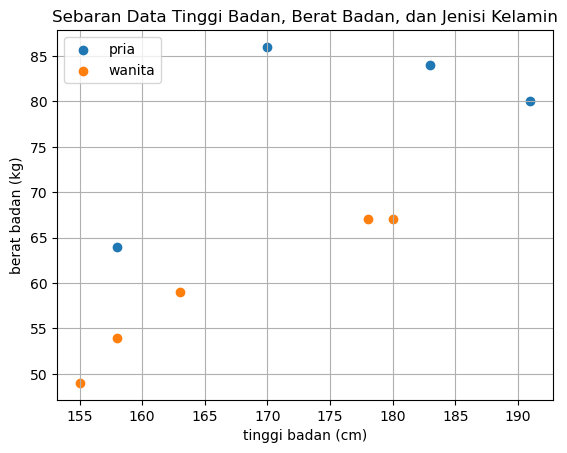

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # Membuat sebuah figure dan axes 
                         # untuk visualisasi. fig adalah keseluruhan gambar, 
                         # sedangkan ax adalah area untuk plot.
for Jk, a in sensus_df.groupby('Jk'): # sensus_df.groupby('Jk'): Mengelompokkan data berdasarkan kolom 'Jk' (jenis kelamin).
    ax.scatter(a['tinggi'], a['berat'], label = Jk) # for Jk, a in ...: Iterasi setiap grup
                                                    # a adalah DataFrame yang berisi data untuk grup tersebut.
    # ax.scatter(a['tinggi'], a['berat'], label = Jk): Membuat plot scatter (titik-titik) pada ax
plt.legend(loc = 'upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenisi Kelamin')
plt.xlabel('tinggi badan (cm)')
plt.ylabel('berat badan (kg)')
plt.grid(True)
plt.show()

#### Classification dengan KNN

#### Preprocessing Dataset

In [3]:
df = sensus_df

In [4]:
X_train = df.iloc[:,:-1]
X_train

,tinggi,berat
0,158,64
1,170,86
2,183,84
3,191,80
4,155,49
5,163,59
6,180,67
7,158,54
8,178,67


In [5]:
y_train = df.iloc[:,-1]

In [6]:
y_train

0      pria
1      pria
2      pria
3      pria
4    wanita
5    wanita
6    wanita
7    wanita
8    wanita
Name: Jk, dtype: object

Perhatikan variabel taget (y_train) masih dalam tipe data object, kita perlu ubah kedalam bentuk numerik. Caranya sebagai berikut.

In [7]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [8]:
y_train = y_train.flatten()
y_train

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

#### Training KNN Classification Model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Prediksi Jenis Kelamin

In [10]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1) 
X_new

array([[155,  70]])

In [11]:
y_new = model.predict(X_new)
y_new

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [12]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

#### Visualisasi Nearest Neighbours

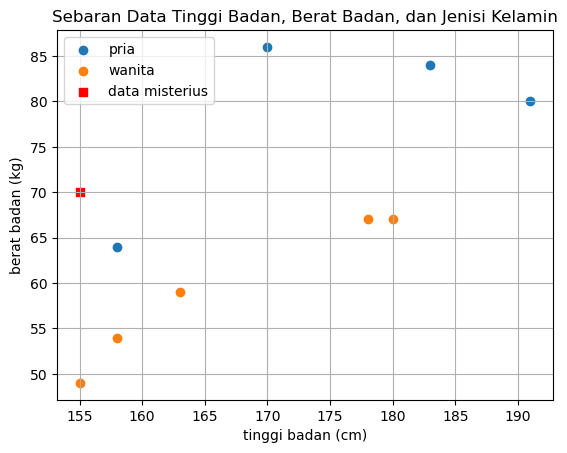

In [13]:
fig, ax = plt.subplots()
for Jk, d in df.groupby("Jk"):
    ax.scatter(d['tinggi'], d['berat'], label = Jk)
    
plt.scatter(tinggi_badan,
          berat_badan,
          marker = 's',
          color ='red',
          label = 'data misterius')

plt.legend(loc = 'upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenisi Kelamin')
plt.xlabel('tinggi badan (cm)')
plt.ylabel('berat badan (kg)')
plt.grid(True)
plt.show()

#### Kalkulasi Distance (Euclidean Distance)

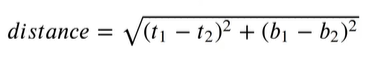

In [14]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [15]:
X_train

,tinggi,berat
0,158,64
1,170,86
2,183,84
3,191,80
4,155,49
5,163,59
6,180,67
7,158,54
8,178,67


In [16]:
import numpy as np
from scipy.spatial.distance import euclidean

# Pastikan misterius adalah array numpy 1-D
misterius = np.asarray(misterius).ravel()

# Pastikan X_train adalah array numpy 2-D
X_train = np.asarray(X_train)

# Iterasi setiap baris di X_train untuk menghitung jarak Euclidean
df_jarak = [euclidean(misterius, row.ravel()) for row in X_train]

# Output hasil
df_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [17]:
df['jarak'] = df_jarak
df.sort_values(['jarak'])

,tinggi,berat,Jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


### Evaluasi KNN Classification Model

#### Testing Set

In [18]:
X_test = np.array([[168, 65], 
                   [180, 96], 
                   [160, 52], 
                   [169, 67]])

y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print("X_test:", X_test)
print("y_test:", y_test)

X_test: [[168  65]
 [180  96]
 [160  52]
 [169  67]]
y_test: [0 0 1 1]


#### Prediksi Terhadap Testing Set

In [19]:
y_pred = model.predict(X_test)
y_pred

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 1, 1])

### Accuracy

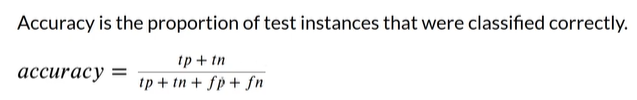

tp = true positif

tn = true negatif

fp = false positif

fn = false negatif

In [20]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Akurasi Score: ' , acc)

Akurasi Score:  0.75


### Precision

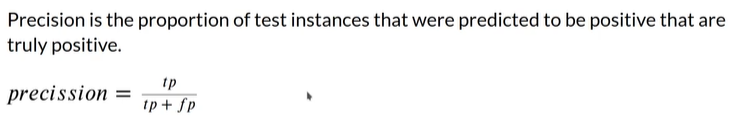

In [21]:
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print('presisi: ' ,prec)

presisi:  0.6666666666666666


### Recall

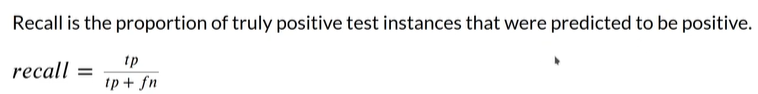

In [22]:
from sklearn.metrics import recall_score
rec = recall_score(y_test, y_pred)
print('recall:', rec)

recall: 1.0


### F1 Score

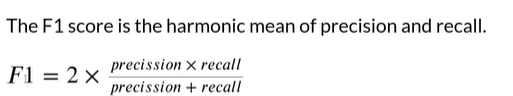

In [23]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1-SCORE:', f1)

F1-SCORE: 0.8


### Classification Report

In [24]:
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print('Classification Report: ', cls_report)

Classification Report:                precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



### Mattew Correlation Coefficient (MCC)

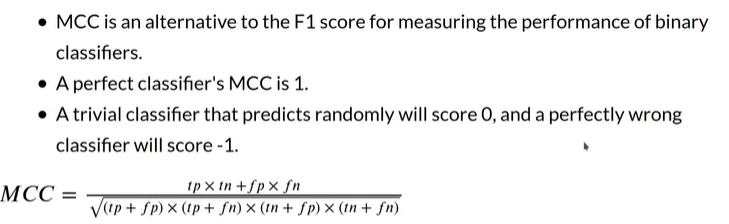

In [25]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)

MCC: 0.5773502691896258
